## Nueral network
- 퍼셉트론, 다층 퍼셉트론(MLP, multilayer perceptron)
- Activation function, Gradient Descent, SGD
- Back propagation


## Sequential 
- 가장 간단한 모델
- 선형 파이프라인(스택)을 정의

#### Dense ?
- 각 레이어의 뉴런들이, 인접한 레이어의 모든 뉴런들과 빽빽히 연결되어 있는 구조

In [1]:
from keras.layers.core import Dense
from keras.models import Sequential

# model = Sequential()
# model.add(Dense(12, input_dim=8, kernel_initializer="random_uniform"))

Using TensorFlow backend.


#### Weight 초기화 옵션들 ( https://keras.io/initializers/ )
- random_uniform, random_normal, zero 등등..
- 참고자료 ; uniform distribution vs. normal distribution  
   (https://www.quora.com/What-is-the-difference-between-normal-distribution-and-uniform-distribution)

#### Activation function ( https://keras.io/activations/ )
- sigmoid ; f(x) = 1 / (1 + e^(-x))
- ReLU ; f(x) = max(0, x)
- etc.


## MNIST 예제로 감잡기
- 6만개 학습 셋, 1만개 테스트 셋
- 각 클래스는 One hot encoding으로 표현

In [2]:
import os

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # training data 중 얼마나 validation set으로 쓸지
DROPOUT = 0.3

MODEL_DIR = "./tmp"

#### 데이터 로드

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED).astype('float32')
X_test = X_test.reshape(10000, RESHAPED).astype('float32')

# 0~1
X_train /= 255
X_test /= 255

# one hot vector
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#### 모델 정의

In [6]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

#### Loss Function 
- https://keras.io/losses/
- MSE ; 예측 값, 실제 값 사이의 평균 제곱 오차
- Binary Cross Entropy ; *-t* x *log(p)* - *(1 - t)* x *log(1 - p)*
- etc.

#### Metric
- https://keras.io/metrics
- Accuracy, Precisionm, Recall

#### Optimizer
- https://keras.io/optimizers
- SGD, RMSprop, Adam (2개의 후자가 더 빨리 수렴. SGD에선 200에폭에 달성한 것을 20에폭에 달성할 수)

#### 모델 컴파일

In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer=OPTIMIZER,
             metrics=['accuracy'])

#### 체크포인트 설정

In [8]:
checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"))

#### 모델 학습
- epochs ; 학습 데이터셋 전체를 살펴본 횟수
- batch_size ; 옵티마이저가 가중치 업데이트를 하기 전까지 살펴본 데이터 수
- **학습 정확도는 반드시 테스트 정확도보다 높아**야 함!! (그렇지 않으면 충분히 학습된게 아니라하네)

In [9]:
history = model.fit(X_train, Y_train,
                   batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                   verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=[checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.5117 - acc: 0.8441 - val_loss: 0.1873 - val_acc: 0.9455
Epoch 2/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.2290 - acc: 0.9321 - val_loss: 0.1407 - val_acc: 0.9576
Epoch 3/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.1740 - acc: 0.9482 - val_loss: 0.1217 - val_acc: 0.9635
Epoch 4/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.1473 - acc: 0.9559 - val_loss: 0.1068 - val_acc: 0.9670
Epoch 5/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.1285 - acc: 0.9606 - val_loss: 0.0986 - val_acc: 0.9703
Epoch 6/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.1152 - acc: 0.9646 - val_loss: 0.0939 - val_acc: 0.9708
Epoch 7/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.1059 - acc: 0.9675 - val_loss: 0.0908 - val_acc

#### 모델 평가

In [10]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 0s 25us/step
Test score: 0.07354960648347332
Test accuracy: 0.9796


#### 시각화

In [11]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])

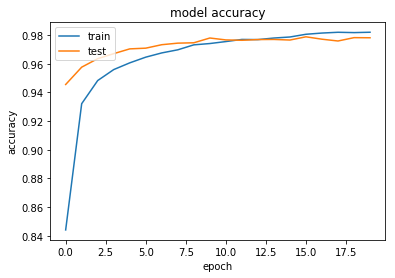

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

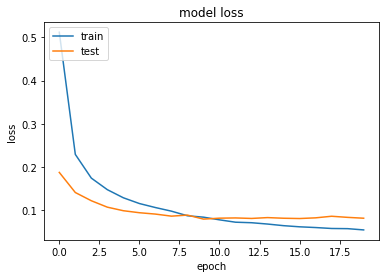

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 기타
- 뭐든 **변경한 이후에 직접 측정**해봐야 알겠지만
- 위 예제에선 LR = 0.001 이 적당
- Dropout도 0.3이 적당 했음.
- SGDs는 Batch size 만큼의 데이터만을 고려해 학습하는 방법인데, 
    - Batch 크기에 따라서도 정확도가 달라 질 수 있다. 64, 128, 256, ... 다 해보기

#### 참고사항
- 모델이 너무 복잡하면 학습 데이터의 수많은 내재적 관계까지 학습해 버릴 가능성 있음
- 이렇게되면 처음 본 데이터에 대해 일반화 할 수 없음.
- Overfitting
- 보통 validation set에 대한 loss는 감소하다가 증가하는 경향 있다. 그 시점에 오버피팅을 의심해 봐야함
- 모델 A, B가 있고 A가 B보다 복잡할 때 두 개가 거의 동일한 성능을 보인다면 덜 복잡한 B를 선택하는게 낫다

#### Regularization이 필요하다!
- https://keras.io/regularizers
- L1 regularization(lasso) ; 모델의 복잡도를 가중치 절댓값의 합으로 표현
- L2 regularization(ridge) ; 모델의 복잡도를 가중치의 제곱 합으로 표현
- Elastic net regularization ; 앞에 두가지 조합

#### 예측하기
- model.predict()
- model.evaluate() ; loss 값 계산
- model.predict_classes() ; 범주 출력 계산
- model.predict_proba() ; 범주 확률 계산

In [14]:
predictions = model.predict_classes(X_test[0].reshape(-1, 784))

In [15]:
predictions, Y_test[0]

(array([7]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))

#### 모델 저장 / 로드 해보기

In [16]:
from keras.models import load_model
model.save('mnist.h5')

In [17]:
del model

In [18]:
model = load_model('mnist.h5')
model

In [19]:
predictions = model.predict_classes(X_test[0].reshape(-1, 784))
predictions

array([7])